
 # PROJECT : IMDB SCRAPER 

###### Importing all the required libraries : 

In [106]:
import os
import requests
from bs4 import BeautifulSoup 
import csv


###### The first thing we’ll need to do to scrape a web page is to download the page. We can download pages using the Python requests library. 
###### The `requests` library will make a `GET` request to a web server, which will download the HTML contents of a given web page for us.

> ######  <font color=red|yellow|blue> We have to manually modify page number through 'start=?' in a url to extract each page one by one . </font> 

whereas, page_num = [1,251,501,751,1001]


<a href="https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2019-08-31&certificates=US%3AG,US%3APG,US%3APG-13,US%3AR&countries=us&count=250&start=1&ref_=adv_nxt" >https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2019-08-31&certificates=US%3AG,US%3APG,US%3APG-13,US%3AR&countries=us&count=250&start=1&ref_=adv_nxt</a>

In [107]:
url = "https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2019-08-31&certificates=US%3AG,US%3APG,US%3APG-13,US%3AR&countries=us&count=250&start=1001&ref_=adv_nxt"
page = requests.get(url)
print(page)

<Response [200]>


###### After running our request, we get a Response object. This object has a `status_code` property, which indicates if the page was downloaded successfully :
###### <font color=blue|red|green|yellow>A status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error .</font>


In [108]:
page.status_code

200

###### We can use the `BeautifulSoup` library to parse the downloaded document, and extract the movies descripition from `a` , `div` and `span` tags.<br><br>For this, we have to create an instance of the BeautifulSoup class first to parse our document then we can  print out the HTML content of the page,<br> <br>  formatted nicely, using the `prettify` method on the `BeautifulSoup object`: <br> <br>

In [109]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Feature Film,
Released between 2017-01-01 and 2019-08-31,
US-G/US-PG/US-PG-13/US-R,
United States
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
  

<br><br><br>

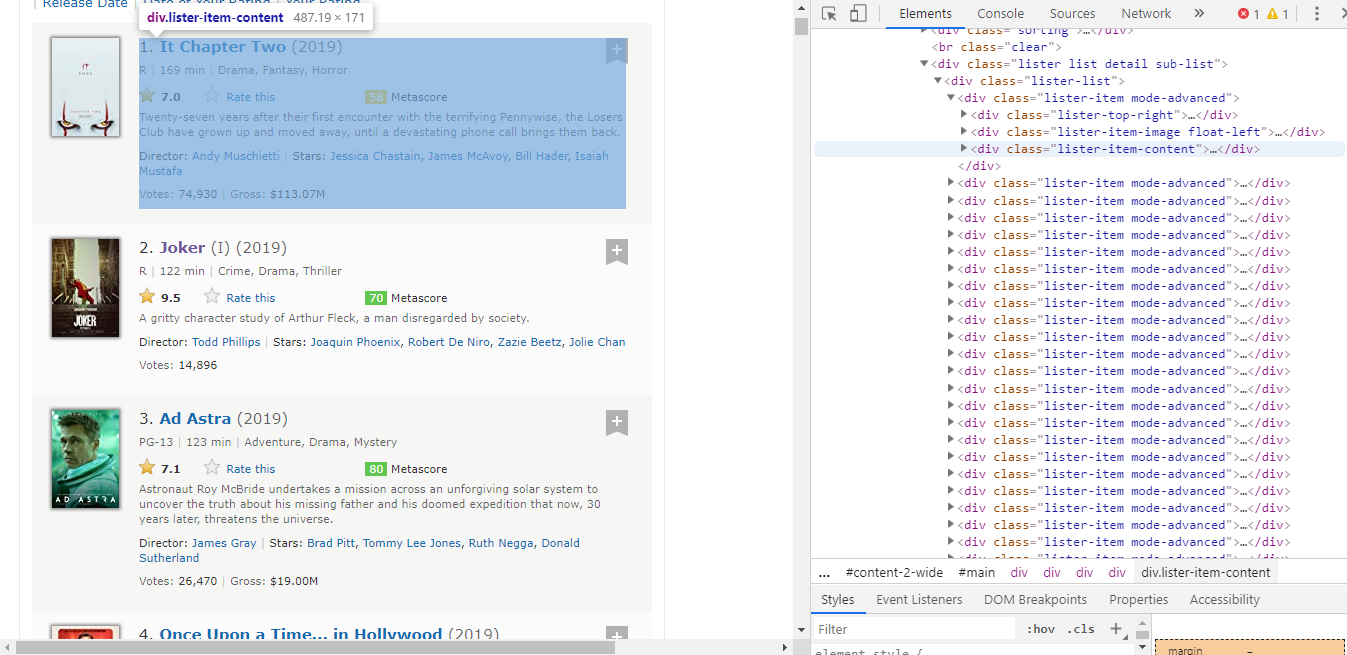

###### - Each `lister-item-content` class contains single movie description.
###### - Here `find_all` will return a list of all `lister-item-content` contains in a single page i.e all movies description

In [110]:
# Checking the no.of movies in a single page
movies_name_list = soup.find_all(class_='lister-item-content')
len(movies_name_list)

158

######  `- Creating lists so we can store each movie's name , year  , genre , duration , user rating , meta score (criics rating) and last but not the least votes.`
#####  `- Once these lists are appended in the csv then we have to clear the lists for the next page's entry for new movies .` 

In [111]:
name = []
year = []
genre = []
duration = []
user_rating = []
critics_rating = []
votes = []


name.clear()
genre.clear()
duration.clear()
user_rating.clear()
critics_rating.clear()
votes.clear()

##### GENERAL INFORMATION ABOUT MOVIES PARSING :


| TAG    |             CLASS                      | DATA |                           
|------  |-------                                 |------|
|   a    |   -                                    | Name |            
| span   |   lister-item-year text-muted unbold   | Year |
| span   |   genre                                | Genre |
| span   |   runtime                              | Duration |
| div    |   inline-block ratings-imdb-rating     | User Rating |
| span   |   metascore favorable   | Critics Rating (High) |
| span   |   metascore mixed                      | Critics Rating (Medium) |
| span   |   metascore unfavorable                | Critics Rating (Low) |
| span   |   -                                   | Votes |     






In [112]:
def iterator(i):
    try:
        mname = movies_name_list[i].find('a').text
        name.append(mname)
    except:
        mname = None
        name.append(mname)
    try:
        myear = movies_name_list[i].find('span',class_="lister-item-year text-muted unbold").text
        year.append(myear)
    except:
        myear=None
        year.append(myear)
    try:
        mgenre = movies_name_list[i].find('span' , class_ = 'genre').text
        genre.append(mgenre.strip())
    except:
        mgenre = None
        genre.append(mgenre)
    try:
        mduration = movies_name_list[i].find('span' , class_ = 'runtime').text
        duration.append(mduration)
    except:
        mduration = None
        duration.append(mduration)
    try:
        muser_rating = movies_name_list[i].find('div' , class_= 'inline-block ratings-imdb-rating').text
        user_rating.append(muser_rating.strip())
    except:
        muser_rating = None
        user_rating.append(muser_rating)
   
    try:
        mcritics_rating = movies_name_list[i].find('span' , class_= 'metascore favorable').text
        critics_rating.append(mcritics_rating.strip())
    
    except:
        try:
            mcritics_rating = movies_name_list[i].find('span' , class_= 'metascore mixed').text
            critics_rating.append(mcritics_rating.strip())
        except:
            try:
                mcritics_rating = movies_name_list[i].find('span' , class_= 'metascore unfavorable').text
                critics_rating.append(mcritics_rating.strip())
            except:
                mcritics_rating =None
                critics_rating.append(mcritics_rating)
                
                    
            
        
    try:
        mvotes = movies_name_list[i].find('span', text='Votes:').find_next('span').text
        votes.append(mvotes)
    except:
        mvotes = None
        votes.append(mvotes)
   
    
for i in range(len(movies_name_list)):
    iterator(i)


In [113]:
print(name)

['The Lurking Man', 'Getting Grace', 'SheChotic', 'Survive The Hollow Shoals', 'Red Forrest', 'The Valley', 'Trek: The Movie', 'Blood Country', 'Always & 4Ever', 'Call Me King', 'Tim Timmerman, Hope of America', 'A Stone Cold Christmas', "Abe & Phil's Last Poker Game", 'Americons', 'Strings', 'Point of no Return', 'A Thousand Junkies', 'Psychos', 'Fortune Defies Death', 'The Goblin', 'Fall of Grace', 'Twice The Dream', 'Holden On', 'Off Season', 'All I Want', 'Stronger', 'Wastelander', 'The Last Ones', 'Elizabeth Blue', 'Day of Days', 'Swamp Ape', 'The 312', 'Segfault', '6:66 PM', 'PupParazzi', 'Razor', 'Kuleana', 'The Last Days of Billy the Kid', 'Polaris', 'Blink', 'Baby Fever', 'Asomatous', 'Mirror Image', 'Robo-Dog: Airborne', 'Vanished', 'The Last Gunslinger', 'Sk8 Dawg', '1 Angry Black Man', 'Dimension Z', 'District', 'The Mason Brothers', 'The Actor', 'Deadly Sanctuary', 'Yesterday', 'Sorceress', 'Small Group', 'The Stream', 'Beta', 'Trew Calling', 'Visage', 'Bug', 'Lust of the 

###### - <font color=blue|red|yellow>The year is in the string data type it has to be type casted in integer . One more thing to be noticed is that some of the values in year's list contains the "part number" of the movie .
</font> 

###### - <font color=red|green>However the "part number" should be with movie's name. For this , we have to split the part number from year and merge it with name after few cells</font> 

In [114]:
print(year)

['(2017)', '(2017)', '(2018)', '(2018)', '(2018)', '(2017)', '(2018)', '(2017)', '(2018)', '(2017)', '(2017)', '(2018)', '(2017)', '(2017)', '(II) (2018)', '(2018)', '(2017)', '(2017)', '(2018)', '(2017)', '(2017)', '(2019)', '(2017)', '(I) (2017)', '(I) (2017)', '(II) (2017)', '(2018)', '(2017)', '(2017)', '(2017)', '(2017)', '(2017)', '(2018)', '(2017)', '(2018)', '(II) (2017)', '(2017)', '(2017)', '(2017)', '(IV) (2018)', '(2017)', '(2017)', '(2017)', '(2017)', '(2018)', '(2017)', '(2018)', '(2018)', '(2017)', '(2018)', '(2017)', '(2018)', '(2017)', '(V) (2018)', '(2017)', '(2018)', '(2017)', '(III) (2017)', '(2017)', '(2017)', '(II) (2017)', '(2017)', '(2017)', '(2018)', '(2018)', '(2017)', '(2019)', '(III) (2018)', '(2018)', '(2018)', '(2017)', '(2017)', '(2018)', '(2018)', '(2017)', '(2017)', '(2018)', '(2018)', '(2018)', '(2017)', '(2018)', '(2017)', '(2018)', '(2017)', '(2017)', '(2017)', '(2017)', '(I) (2019)', '(2017)', '(2018)', '(2019)', '(2017)', '(2018)', '(2017)', '(II) 

In [115]:
print(duration)

['90 min', '112 min', '93 min', '78 min', '75 min', '95 min', '102 min', '89 min', None, '118 min', '94 min', '90 min', '85 min', '89 min', '103 min', '90 min', '75 min', '82 min', '115 min', '67 min', '81 min', '101 min', '102 min', '86 min', '91 min', '125 min', '90 min', '78 min', '95 min', '107 min', '59 min', '75 min', '90 min', '82 min', '97 min', '87 min', '95 min', '80 min', '79 min', '98 min', '84 min', '90 min', '76 min', '88 min', '84 min', '80 min', '90 min', '92 min', '70 min', '67 min', '114 min', '104 min', '100 min', None, '84 min', None, '80 min', '84 min', None, None, '95 min', '77 min', '98 min', None, None, '77 min', '89 min', '64 min', '53 min', '64 min', '81 min', '97 min', '78 min', '96 min', '82 min', '101 min', None, None, '110 min', '92 min', '106 min', None, '94 min', '76 min', '83 min', '87 min', '74 min', '90 min', '105 min', '84 min', None, '110 min', '95 min', '94 min', '90 min', '60 min', '121 min', '60 min', '108 min', '95 min', '107 min', '90 min', '10

In [116]:
print(genre)

['Drama, Fantasy, Horror', 'Comedy, Drama', 'Drama, Horror, Mystery', 'Horror', 'Horror', 'Drama, Mystery', 'Comedy, Drama, Family', 'Western', 'Thriller', 'Action, Crime, Drama', 'Comedy, Romance', 'Romance', 'Comedy, Drama', 'Action, Biography, Crime', 'Drama', 'Action, Adventure, Thriller', 'Comedy, Drama', 'Crime, Drama, Horror', 'Crime, Drama, Mystery', 'Fantasy, Horror, Thriller', 'Horror', 'Family', 'Biography, Drama', 'Drama, Thriller', 'Comedy, Drama, Romance', 'Drama', 'Action, Adventure, Sci-Fi', 'Horror, Sci-Fi, Thriller', 'Drama', 'Drama', 'Adventure, Comedy, Horror', 'Comedy, Drama, Romance', 'Action, Thriller', 'Comedy, Horror', 'Family', 'Comedy', 'Drama, Mystery', 'Western', 'Drama', 'Drama', 'Comedy', 'Thriller', 'Horror, Thriller', 'Family', 'Thriller', 'Western', 'Adventure, Comedy, Family', 'Drama', 'Horror', 'Drama', 'Crime, Drama, Thriller', 'Comedy, Crime, Drama', 'Family, Mystery, Thriller', 'Drama', 'Drama, Fantasy, Horror', 'Drama', 'Horror', 'Adventure, Fant

In [117]:
print(user_rating)

['7.8', '7.3', '2.8', '5.1', '7.6', '7.7', '5.5', '5.5', '7.8', '5.6', '5.6', '6.7', '5.7', '4.0', '5.8', '4.0', '5.8', '2.8', '7.4', '5.0', '4.2', '7.9', '7.1', '4.9', '4.8', '7.0', '2.6', '3.8', '6.0', '4.4', '3.4', '6.1', '7.6', '6.1', '4.2', '6.4', '7.9', '1.4', '4.4', '4.5', '2.7', '3.6', '6.2', '4.9', '4.1', '2.0', '4.4', '7.2', '8.1', '5.8', '5.7', '5.9', '3.6', None, '4.6', '9.2', '2.8', '6.3', '6.1', '7.4', '4.5', '1.9', '5.3', '4.8', '6.8', '5.9', '4.5', '6.8', '1.9', '7.1', '7.2', None, '6.8', '7.9', '5.3', '5.8', None, None, None, '5.2', None, '7.0', '5.4', '2.9', '3.9', None, '4.4', None, '4.1', '3.1', None, '8.5', '5.9', None, '6.1', '8.4', '4.9', None, '6.0', None, '8.1', '6.0', '6.4', '4.1', None, '7.9', '6.1', '7.7', '2.5', '7.0', '4.8', '3.8', '3.8', '7.0', None, None, '3.0', '5.3', None, '4.5', '7.6', None, None, '5.0', '3.9', '9.0', '7.9', '6.3', None, None, '8.7', '7.5', None, None, '7.8', None, '5.2', None, None, '4.1', None, None, '6.7', '4.7', None, None, None, 

In [118]:
print(critics_rating)

[None, None, None, None, None, '33', None, None, None, None, None, None, '48', '25', None, None, None, None, None, None, None, None, None, None, None, None, None, None, '48', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [119]:
print(votes)

['344', '296', '64', '160', '1,304', '41', '90', '123', '25', '314', '272', '79', '188', '198', '57', '113', '178', '227', '18', '42', '471', '52', '116', '42', '112', '25', '148', '40', '73', '48', '172', '18', '5', '700', '39', '11', '45', '73', '48', '60', '18', '21', '70', '128', '15', '89', '16', '9', '343', '29', '229', '76', '113', None, '96', '151', '26', '57', '17', '15', '43', '9', '15', '5', '5', '28', '18', '6', '11', '16', '43', None, '12', '191', '2,852', '65', None, None, None, '74', None, '11', '27', '18', '11', None, '44', None, '19', '49', None, '203', '2,684', None, '8', '26', '92', None, '5', None, '44', '26', '10', '42', None, '148', '33', '9', '6', '7', '175', '109', '13', '11', None, None, '36', '22', None, '24', '9', None, None, '5', '7', '40', '17', '150', None, None, '6', '8', None, None, '9', None, '5', None, None, '22', None, None, '13', '9', None, None, None, None, None, None, None, None, '7', None, None, None, '18', None]


In [120]:
print(len(name),len(year),len(genre),len(duration),len(user_rating),len(critics_rating),len(votes))

158 158 158 158 158 158 158


###### Converting Duration , Users Rating , Critics Rating and Votes in integer .

In [121]:
for i in range(len(duration)):
    try:
        num = duration[i].replace("min","")
        num= int(num)
        del duration[i]
        duration.insert(i,num)
    except:
        num = None
        del duration[i]
        duration.insert(i,num)
    
print(duration)

[90, 112, 93, 78, 75, 95, 102, 89, None, 118, 94, 90, 85, 89, 103, 90, 75, 82, 115, 67, 81, 101, 102, 86, 91, 125, 90, 78, 95, 107, 59, 75, 90, 82, 97, 87, 95, 80, 79, 98, 84, 90, 76, 88, 84, 80, 90, 92, 70, 67, 114, 104, 100, None, 84, None, 80, 84, None, None, 95, 77, 98, None, None, 77, 89, 64, 53, 64, 81, 97, 78, 96, 82, 101, None, None, 110, 92, 106, None, 94, 76, 83, 87, 74, 90, 105, 84, None, 110, 95, 94, 90, 60, 121, 60, 108, 95, 107, 90, 100, 70, 78, 75, 80, 64, 95, 92, 88, 46, 75, 66, 96, 57, 70, 93, 111, 93, 106, 83, 65, 90, 45, 85, 73, 93, 80, 87, 55, 49, 57, 54, 91, 61, 89, 56, 72, 81, 59, 77, 48, 80, 90, None, 52, 81, 94, 75, None, 107, 52, 60, 58, None, 76, 80]


In [122]:
for i in range(len(user_rating)):
    try:
        num= float(user_rating[i])
        del user_rating[i]
        user_rating.insert(i,num)
    except:
        num = None
        del user_rating[i]
        user_rating.insert(i,num)
    
print(user_rating)

[7.8, 7.3, 2.8, 5.1, 7.6, 7.7, 5.5, 5.5, 7.8, 5.6, 5.6, 6.7, 5.7, 4.0, 5.8, 4.0, 5.8, 2.8, 7.4, 5.0, 4.2, 7.9, 7.1, 4.9, 4.8, 7.0, 2.6, 3.8, 6.0, 4.4, 3.4, 6.1, 7.6, 6.1, 4.2, 6.4, 7.9, 1.4, 4.4, 4.5, 2.7, 3.6, 6.2, 4.9, 4.1, 2.0, 4.4, 7.2, 8.1, 5.8, 5.7, 5.9, 3.6, None, 4.6, 9.2, 2.8, 6.3, 6.1, 7.4, 4.5, 1.9, 5.3, 4.8, 6.8, 5.9, 4.5, 6.8, 1.9, 7.1, 7.2, None, 6.8, 7.9, 5.3, 5.8, None, None, None, 5.2, None, 7.0, 5.4, 2.9, 3.9, None, 4.4, None, 4.1, 3.1, None, 8.5, 5.9, None, 6.1, 8.4, 4.9, None, 6.0, None, 8.1, 6.0, 6.4, 4.1, None, 7.9, 6.1, 7.7, 2.5, 7.0, 4.8, 3.8, 3.8, 7.0, None, None, 3.0, 5.3, None, 4.5, 7.6, None, None, 5.0, 3.9, 9.0, 7.9, 6.3, None, None, 8.7, 7.5, None, None, 7.8, None, 5.2, None, None, 4.1, None, None, 6.7, 4.7, None, None, None, None, None, None, None, None, 8.3, None, None, None, 7.1, None]


In [123]:
for i in range(len(critics_rating)):
    try:
        num = int(critics_rating[i])
        del critics_rating[i]
        critics_rating.insert(i,num)
    except :
        num = None
        del critics_rating[i]
        critics_rating.insert(i,num)
        
        
        
print(critics_rating)

[None, None, None, None, None, 33, None, None, None, None, None, None, 48, 25, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 48, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [124]:
for i in range(len(votes)):
    try:
        rep = votes[i].replace(',','')
        num = int(rep)
        del votes[i]
        votes.insert(i,num)
            
    except :
        try:
            del critics_rating[i]
            critics_rating.insert(i,num)
        except:
            critics_rating[i]=None
            del critics_rating[i]
            critics_rating.insert(i,num)
        
        num =None
print(votes)

[344, 296, 64, 160, 1304, 41, 90, 123, 25, 314, 272, 79, 188, 198, 57, 113, 178, 227, 18, 42, 471, 52, 116, 42, 112, 25, 148, 40, 73, 48, 172, 18, 5, 700, 39, 11, 45, 73, 48, 60, 18, 21, 70, 128, 15, 89, 16, 9, 343, 29, 229, 76, 113, None, 96, 151, 26, 57, 17, 15, 43, 9, 15, 5, 5, 28, 18, 6, 11, 16, 43, None, 12, 191, 2852, 65, None, None, None, 74, None, 11, 27, 18, 11, None, 44, None, 19, 49, None, 203, 2684, None, 8, 26, 92, None, 5, None, 44, 26, 10, 42, None, 148, 33, 9, 6, 7, 175, 109, 13, 11, None, None, 36, 22, None, 24, 9, None, None, 5, 7, 40, 17, 150, None, None, 6, 8, None, None, 9, None, 5, None, None, 22, None, None, 13, 9, None, None, None, None, None, None, None, None, 7, None, None, None, 18, None]


###### - <font color=red|green>The "part number" should be with movie's name. For this , we have to merge the slice of part number in year with movie's name and replace that string in the year to the whitespace </font> 

In [125]:
print(year)

['(2017)', '(2017)', '(2018)', '(2018)', '(2018)', '(2017)', '(2018)', '(2017)', '(2018)', '(2017)', '(2017)', '(2018)', '(2017)', '(2017)', '(II) (2018)', '(2018)', '(2017)', '(2017)', '(2018)', '(2017)', '(2017)', '(2019)', '(2017)', '(I) (2017)', '(I) (2017)', '(II) (2017)', '(2018)', '(2017)', '(2017)', '(2017)', '(2017)', '(2017)', '(2018)', '(2017)', '(2018)', '(II) (2017)', '(2017)', '(2017)', '(2017)', '(IV) (2018)', '(2017)', '(2017)', '(2017)', '(2017)', '(2018)', '(2017)', '(2018)', '(2018)', '(2017)', '(2018)', '(2017)', '(2018)', '(2017)', '(V) (2018)', '(2017)', '(2018)', '(2017)', '(III) (2017)', '(2017)', '(2017)', '(II) (2017)', '(2017)', '(2017)', '(2018)', '(2018)', '(2017)', '(2019)', '(III) (2018)', '(2018)', '(2018)', '(2017)', '(2017)', '(2018)', '(2018)', '(2017)', '(2017)', '(2018)', '(2018)', '(2018)', '(2017)', '(2018)', '(2017)', '(2018)', '(2017)', '(2017)', '(2017)', '(2017)', '(I) (2019)', '(2017)', '(2018)', '(2019)', '(2017)', '(2018)', '(2017)', '(II) 

In [126]:
for i in range(len(year)):
    old = year[i].replace('(' , "")  # 'II) 2019)'    / 2019)
    new = old.replace(')' , "")     # 'II 2019'   / 2019
    try:
        num = int(new)     #if its a number
        del year[i]    #that year will be deleted
        year.insert(i , num)     #new int year will be added
    except:
        merge = name[i]+" "+new[:2]  #if its not a number then name[i] eg joker wll be merge to new[:2] 
        del name[i]    # name[i] eg joker will be deleted
        name.insert(i , merge)     # new merged name eg 'joker I' will be inserted into name[i] 
            
        if 'XVI' in new:
            rem = new.replace('XVI',"")    # XVI will be removed 
            rem = rem.strip()              # whitespaces will be striped  
            del year[i]                    # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)            # converting in int
            year.insert(i,num_year)        # new integer year 2019 will inserted in year
        elif 'VIII' in new:
            rem = new.replace('VIII',"")    
            rem = rem.strip()            
            del year[i]            
            num_year = int(rem)
            year.insert(i,num_year)

        elif 'XI' in new:
            rem = new.replace('XI',"")    
            rem = rem.strip()         # whitespaces will be striped
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year)
        elif 'IV' in new:
            rem = new.replace('IV',"")   
            rem = rem.strip()             # whitespaces will be striped
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year)  
            
        elif "V" in new:
            rem = new.replace("V","")   
            rem = rem.strip()      # whitespaces will be striped
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year) 
        
        elif 'VI' in new:
            rem = new.replace('VI',"")    
            rem = rem.strip()   
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year)
       
        elif 'VX' in new:
            rem = new.replace('VX',"")   
            rem = rem.strip()         # whitespaces will be striped
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year)  
        elif 'VXI' in new:
            rem = new.replace('VXI',"")    
            rem = rem.strip()             # whitespaces will be striped
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year)
        elif 'I' in new:
            rem = new.replace('I',"")    # I, II or III will be removed
            rem = rem.strip()             # whitespaces will be striped
            del year[i]            # year 2019/2018/2017 will be deleted from year
            num_year = int(rem)
            year.insert(i,num_year)   # new integer year 2019 will inserted in year 
        


###### Name and Year after modification :

In [127]:
name

['The Lurking Man',
 'Getting Grace',
 'SheChotic',
 'Survive The Hollow Shoals',
 'Red Forrest',
 'The Valley',
 'Trek: The Movie',
 'Blood Country',
 'Always & 4Ever',
 'Call Me King',
 'Tim Timmerman, Hope of America',
 'A Stone Cold Christmas',
 "Abe & Phil's Last Poker Game",
 'Americons',
 'Strings II',
 'Point of no Return',
 'A Thousand Junkies',
 'Psychos',
 'Fortune Defies Death',
 'The Goblin',
 'Fall of Grace',
 'Twice The Dream',
 'Holden On',
 'Off Season I ',
 'All I Want I ',
 'Stronger II',
 'Wastelander',
 'The Last Ones',
 'Elizabeth Blue',
 'Day of Days',
 'Swamp Ape',
 'The 312',
 'Segfault',
 '6:66 PM',
 'PupParazzi',
 'Razor II',
 'Kuleana',
 'The Last Days of Billy the Kid',
 'Polaris',
 'Blink IV',
 'Baby Fever',
 'Asomatous',
 'Mirror Image',
 'Robo-Dog: Airborne',
 'Vanished',
 'The Last Gunslinger',
 'Sk8 Dawg',
 '1 Angry Black Man',
 'Dimension Z',
 'District',
 'The Mason Brothers',
 'The Actor',
 'Deadly Sanctuary',
 'Yesterday V ',
 'Sorceress',
 'Small 

In [128]:
year

[2017,
 2017,
 2018,
 2018,
 2018,
 2017,
 2018,
 2017,
 2018,
 2017,
 2017,
 2018,
 2017,
 2017,
 2018,
 2018,
 2017,
 2017,
 2018,
 2017,
 2017,
 2019,
 2017,
 2017,
 2017,
 2017,
 2018,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2017,
 2018,
 2017,
 2017,
 2017,
 2017,
 2018,
 2017,
 2017,
 2017,
 2017,
 2018,
 2017,
 2018,
 2018,
 2017,
 2018,
 2017,
 2018,
 2017,
 2018,
 2017,
 2018,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2018,
 2017,
 2019,
 2018,
 2018,
 2018,
 2017,
 2017,
 2018,
 2018,
 2017,
 2017,
 2018,
 2018,
 2018,
 2017,
 2018,
 2017,
 2018,
 2017,
 2017,
 2017,
 2017,
 2019,
 2017,
 2018,
 2019,
 2017,
 2018,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2018,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2019,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2018,
 2017,
 2017,
 2017,
 2019,
 2017,
 2018,
 2017,
 2017,
 2017,
 2018,
 2018,
 2017,
 2018,
 2017,
 2018,
 2018,
 2017,
 2017,
 2018,
 2017,

### Time to make a 2D list:
###### To store the information in a CSV file , we have to collect each movie's complete description in a list.Then append all these lists in a single list. 

In [129]:
each_l = []
l = []
head_l=['movie_name','released_year','genre','duration_min','user_rating','critics_rating','votes']
l.append(head_l)
for i in range(len(name)):
    each_l.append(name[i])
    each_l.append(year[i])
    each_l.append(genre[i])
    each_l.append(duration[i])
    each_l.append(user_rating[i])
    each_l.append(critics_rating[i])
    each_l.append(votes[i])
    l.append(each_l[:])
    each_l.clear()   #clear() will make the list empty to store the next movie's info.

###### Checking the format :

In [130]:
for i in l:
    print(i)

['movie_name', 'released_year', 'genre', 'duration_min', 'user_rating', 'critics_rating', 'votes']
['The Lurking Man', 2017, 'Drama, Fantasy, Horror', 90, 7.8, None, 344]
['Getting Grace', 2017, 'Comedy, Drama', 112, 7.3, None, 296]
['SheChotic', 2018, 'Drama, Horror, Mystery', 93, 2.8, None, 64]
['Survive The Hollow Shoals', 2018, 'Horror', 78, 5.1, None, 160]
['Red Forrest', 2018, 'Horror', 75, 7.6, None, 1304]
['The Valley', 2017, 'Drama, Mystery', 95, 7.7, 33, 41]
['Trek: The Movie', 2018, 'Comedy, Drama, Family', 102, 5.5, None, 90]
['Blood Country', 2017, 'Western', 89, 5.5, None, 123]
['Always & 4Ever', 2018, 'Thriller', None, 7.8, None, 25]
['Call Me King', 2017, 'Action, Crime, Drama', 118, 5.6, None, 314]
['Tim Timmerman, Hope of America', 2017, 'Comedy, Romance', 94, 5.6, None, 272]
['A Stone Cold Christmas', 2018, 'Romance', 90, 6.7, None, 79]
["Abe & Phil's Last Poker Game", 2017, 'Comedy, Drama', 85, 5.7, 48, 188]
['Americons', 2017, 'Action, Biography, Crime', 89, 4.0, 2

###### `os.stat()` method in Python performs stat() system call on the specified path. This method is used to get status of the specified path.

###### `st_size` attribute : represents the size of the file in bytes.

In [131]:
import os
filename = "imdb dataset.csv"
fileEmpty = os.stat(filename).st_size == 0
with open(filename,"a" , encoding='utf-8', newline="") as f:
    writer = csv.writer(f)
    
# if the fileEmpty is TRUE ; means the file is empty , each and every row (list) in a 2D list will be written in a file . 
    if fileEmpty:
        for item in l:
            writer.writerow(item)
            
# if the fileEmpty is False ; means some of the movies info already exists in the file then all the rows (lists) except 1st row (list[0])
# i.e headers in a 2D list will be written in a file . 
    else:
        for item in l[1:]:
            writer.writerow(item)

### That's it ! Just enter the page number in url and extract the information mutliple times you want .